# Rf 7 0 6_Histpdf

Special p.d.f.'s: histogram based p.d.f.s and functions




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:02 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Create pdf for sampling
---------------------------------------------

In [2]:
x = ROOT.RooRealVar("x", "x", 0, 20)
p = ROOT.RooPolynomial("p", "p", x, ROOT.RooArgList(ROOT.RooFit.RooConst(
    0.01), ROOT.RooFit.RooConst(-0.01), ROOT.RooFit.RooConst(0.0004)))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create low stats histogram
---------------------------------------------------

Sample 500 events from p

In [3]:
x.setBins(20)
data1 = p.generate(ROOT.RooArgSet(x), 500)

Create a binned dataset with 20 bins and 500 events

In [4]:
hist1 = data1.binnedClone()

Represent data in dh as pdf in x

In [5]:
histpdf1 = ROOT.RooHistPdf("histpdf1", "histpdf1", ROOT.RooArgSet(x), hist1, 0)

Plot unbinned data and histogram pdf overlaid

In [6]:
frame1 = x.frame(ROOT.RooFit.Title(
    "Low statistics histogram pdf"), ROOT.RooFit.Bins(100))
data1.plotOn(frame1)
histpdf1.plotOn(frame1)

<ROOT.RooPlot object ("frame_x_556e7f6fff90") at 0x556e7f6fff90>

Create high stats histogram
-----------------------------------------------------

Sample 100000 events from p

In [7]:
x.setBins(10)
data2 = p.generate(ROOT.RooArgSet(x), 100000)

Create a binned dataset with 10 bins and 100K events

In [8]:
hist2 = data2.binnedClone()

Represent data in dh as pdf in x, 2nd order interpolation

In [9]:
histpdf2 = ROOT.RooHistPdf("histpdf2", "histpdf2", ROOT.RooArgSet(x), hist2, 2)

Plot unbinned data and histogram pdf overlaid

In [10]:
frame2 = x.frame(ROOT.RooFit.Title(
    "High stats histogram pdf with interpolation"), ROOT.RooFit.Bins(100))
data2.plotOn(frame2)
histpdf2.plotOn(frame2)

c = ROOT.TCanvas("rf706_histpdf", "rf706_histpdf", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.4)
frame1.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.8)
frame2.Draw()

c.SaveAs("rf706_histpdf.png")

Info in <TCanvas::Print>: png file rf706_histpdf.png has been created


Draw all canvases 

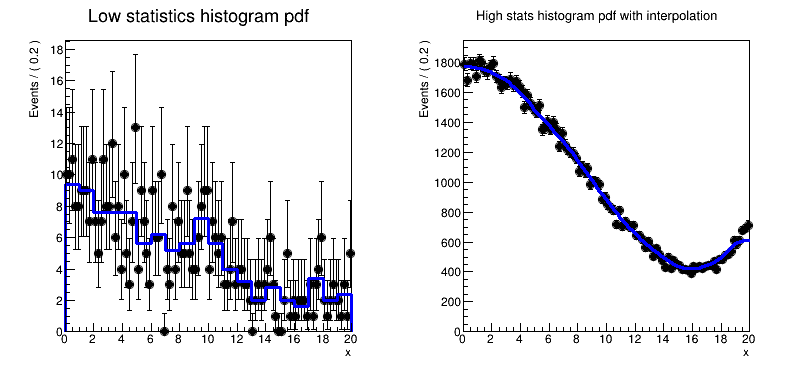

In [11]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()